<a href="https://colab.research.google.com/github/AnaCeci32/Diplomado_CMD/blob/main/spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA






In [ ]:
#Importar paquete nltk para el preprocesamiento de datos por medio de NLP.
import nltk
nltk.download("punkt")
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


NLP nos ayudará a eliminar stopwords, obtener una lista de todas las palabras después de eliminar las stopwords, analizar la frecuencia de palabras y trazar gráfico


In [ ]:
#cargar la base de datos
df= pd.read_csv("spam.csv", encoding='latin-1')
df.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df = df.replace(['ham','spam'],[0, 1])
df.head(10)

,class,text
0,0,Go jurong point crazy Available bugis n great ...
1,0,Ok lar Joking wif u oni
2,1,Free entry 2 wkly comp win FA Cup final tkts 2...
3,0,U dun say early hor U c already say
4,0,Nah dont think goes usf lives around though
5,1,FreeMsg Hey darling 3 weeks word back Id like ...
6,0,Even brother like speak treat like aids patent
7,0,per request Melle Melle Oru Minnaminunginte Nu...
8,1,WINNER valued network customer selected receiv...
9,1,mobile 11 months U R entitled Update latest co...


In [ ]:

import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

#Quitar stopwords y signos de puntuaciön
import string
def text_process(text):

    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]

    return " ".join(text)

df['text'] = df['text'].apply(text_process)

df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,class,text
0,0,Go jurong point crazy Available bugis n great ...
1,0,Ok lar Joking wif u oni
2,1,Free entry 2 wkly comp win FA Cup final tkts 2...
3,0,U dun say early hor U c already say
4,0,Nah dont think goes usf lives around though


In [ ]:

text = pd.DataFrame(df['text'])
class1= pd.DataFrame(df['class'])


In [ ]:
## Repetición de palabras
from collections import Counter

total_counts = Counter()
for i in range(len(text)):
    for word in text.values[i][0].split(" "):
        total_counts[word] += 1

print("Total words in data set: ", len(total_counts))


Total words in data set:  11305


In [ ]:
#  frecuencia
vocab = sorted(total_counts, key=total_counts.get, reverse=True)
print(vocab[:60])

['u', '2', 'call', 'U', 'get', 'Im', 'ur', '4', 'ltgt', 'know', 'go', 'like', 'dont', 'come', 'got', 'time', 'day', 'want', 'Ill', 'lor', 'Call', 'home', 'send', 'going', 'one', 'need', 'Ok', 'good', 'love', 'back', 'n', 'still', 'text', 'im', 'later', 'see', 'da', 'ok', 'think', 'Ì', 'free', 'FREE', 'r', 'today', 'Sorry', 'week', 'phone', 'mobile', 'cant', 'tell', 'take', 'much', 'night', 'way', 'Hey', 'reply', 'work', 'make', 'give', 'new']


In [ ]:


vocab_size = len(vocab)
word2idx = {}
#print vocab_size
for i, word in enumerate(vocab):
    word2idx[word] = i

In [ ]:
# Texto
def text_to_vector(text):
    word_vector = np.zeros(vocab_size)
    for word in text.split(" "):
        if word2idx.get(word) is None:
            continue
        else:
            word_vector[word2idx.get(word)] += 1
    return np.array(word_vector)

In [ ]:
#vectores
word_vectors = np.zeros((len(text), len(vocab)), dtype=np.int_)
for i, (_, text_) in enumerate(text.iterrows()):
    word_vectors[i] = text_to_vector(text_[0])

word_vectors.shape

(5572, 11305)

In [ ]:
#texto en vectores
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(df['text'])
vectors.shape
vectors

<5572x9376 sparse matrix of type '<class 'numpy.float64'>'
	with 47254 stored elements in Compressed Sparse Row format>

In [ ]:
#vectores de palabras
features = vectors

In [ ]:
#Dividir el dataset en trainset y testset
X_train, X_test, y_train, y_test = train_test_split(features, df['class'], test_size=0.15, random_state=111)

In [ ]:

scaler= StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#clasificación
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)

In [ ]:
#hacer una serie con variables de cada modelo.
clfs = {'SVC' : svc,'KN' : knc, "NB" : mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc}

In [ ]:
# Ajustar los datos a los modelos.
def train(clf, features, targets):
    clf.fit(features, targets)

def predict(clf, features):
    return (clf.predict(features))

In [ ]:
pred_punt_word_vectors = []
for k,v in clfs.items():
    train(v, X_train, y_train)
    pred = predict(v, X_test)
    pred_punt_word_vectors.append((k, [accuracy_score(y_test , pred)]))

In [ ]:
pred_scores_word_vectors

[('SVC', [0.9784688995215312]),
 ('KN', [0.9330143540669856]),
 ('NB', [0.9880382775119617]),
 ('DT', [0.9605263157894737]),
 ('LR', [0.9533492822966507]),
 ('RF', [0.9796650717703349])]

In [ ]:
#Funcion para detectar si una palabra o texto puede o no ser spam.
def find(x):
    if x == 1:
        print ("Es SPAM")
    else:
        print ("No es SPAM")

In [ ]:
texto_prueba = ["free"]
integers = vectorizer.transform(texto_prueba)

In [ ]:
x = mnb.predict(integers)
find(x)

No es SPAM


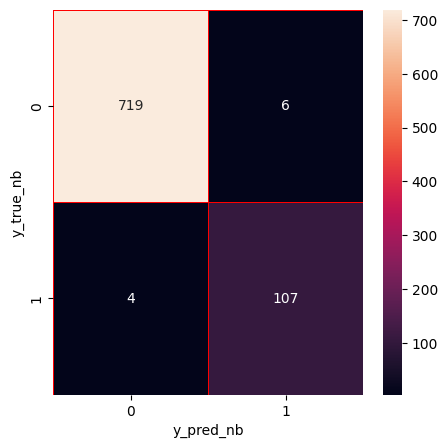

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Naive Bayes
y_pred_nb = mnb.predict(X_test)
y_true_nb = y_test
cm = confusion_matrix(y_true_nb, y_pred_nb)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_nb")
plt.ylabel("y_true_nb")
plt.show()

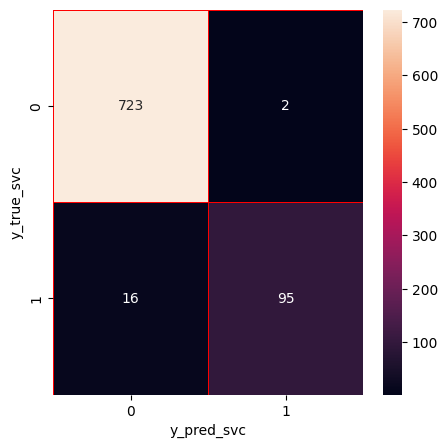

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# SVC
y_pred_svc = svc.predict(X_test)
y_true_svc = y_test
cm = confusion_matrix(y_true_svc, y_pred_svc)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_svc")
plt.ylabel("y_true_svc")
plt.show()

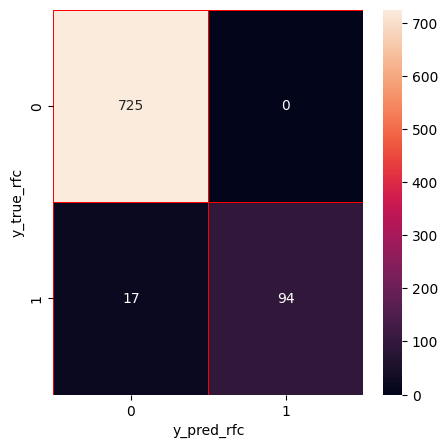

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# RFC
y_pred_rfc = rfc.predict(X_test)
y_true_rfc = y_test
cm = confusion_matrix(y_true_rfc, y_pred_rfc)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_rfc")
plt.ylabel("y_true_rfc")
plt.show()